<a href="https://colab.research.google.com/github/Vany2002/pythonProject1/blob/master/Pr10_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Error = 5539.2217994604125
Error = 3728.7677711965216
Error = 3365.1695437960516
Error = 3170.8991196679453
Error = 3058.711005674874
Error = 3002.9527663385466
Error = 2975.84316688334
Error = 2961.5071017035575
Error = 2952.835418361992
Error = 2946.449210624502
Error = 2940.113241741991
Error = 2931.5863123699637
Error = 2919.3050320181733
Error = 2906.5267204008496
Error = 2896.792227510355


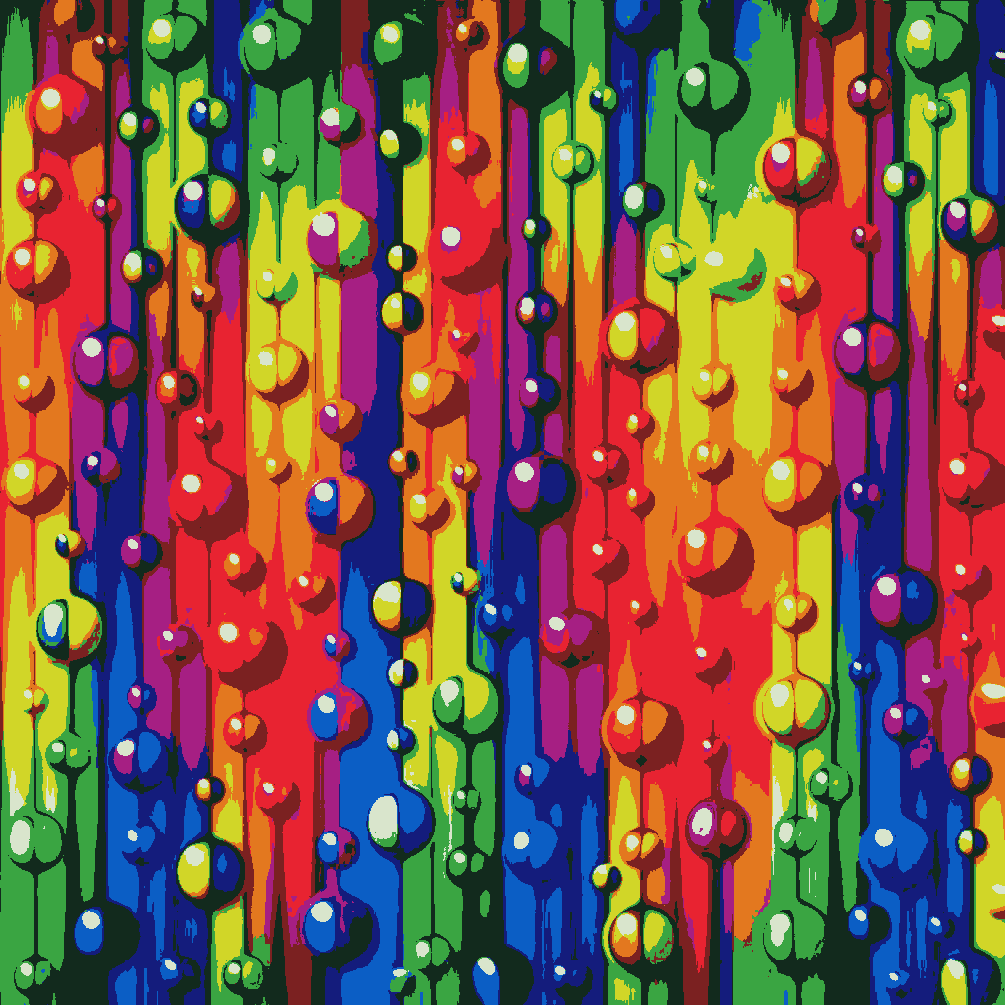

In [48]:
import numpy as np
import matplotlib
from PIL import Image

def kmeans(Input,K,Max_iters):

  N,D = np.shape(Input)
  R = np.random.permutation(N)
  Kvec = Input[R[0:K],:]
  Distance = np.zeros((N,K))

  for nn in range(0,Max_iters):
    F = np.zeros((N,K))
    for kk in range(0,K):
      Distance[:,kk] = np.sum( np.square(Input - np.tile( Kvec[kk,:],
(N,1)),dtype=np.float64),axis=1 )
    Dmin = Distance.argmin(axis=1) % Distance.shape[1]
    for mm in range(0,K):
      if np.size(Dmin[mm==Dmin]) >0:
        Kvec[mm,:] = np.mean(Input[mm==Dmin],axis=0)
    for ii in range(0,N):
      F[ii,Dmin[ii]] = 1
    error = sum(sum((F*Distance)/N))
    print('Error = ' + str(error))
  return Kvec,Dmin

Datain = np.asarray(Image.open('input.jpeg'),dtype=np.float64)
ReshapedData = np.reshape(Datain, (np.size(Datain,0) *
np.size(Datain,1),np.size(Datain,2)))
K = 10
Max_iters = 15
Kvec,Dmin = kmeans(ReshapedData,K,Max_iters)
Dvec = np.zeros((len(Dmin),len(Kvec[0,:])))
for jj in range(0,K):
 Dvec[jj==Dmin,:] = Kvec[jj,:]
imout = np.reshape(np.uint8(Dvec),
(np.size(Datain,0),np.size(Datain,1),len(Kvec[0,:])))
im = Image.fromarray(imout,'RGB')
im.show()
im.save('output.jpeg', "JPEG", optimize = True)